<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/THRISS/04_example_mediapipe_pose_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example detecting pose landmarks with mediapipe

In this example we will detect keypoints of human in an image. We will use the [Mediapipe](https://ai.google.dev/edge/mediapipe/solutions/guide) by Google.

##### Original Notebook - Copyright 2023 The MediaPipe Authors. All Rights Reserved.

Revised version by Viktor Kocur released under Apache 2.0

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Pose Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect pose landmarks from images.

## Preparation

Let's start with installing MediaPipe.


In [2]:
!pip install -q mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 3.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker#models) for more information about this model bundle.

In [3]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

## Visualization utilities

In [4]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

## Download test image

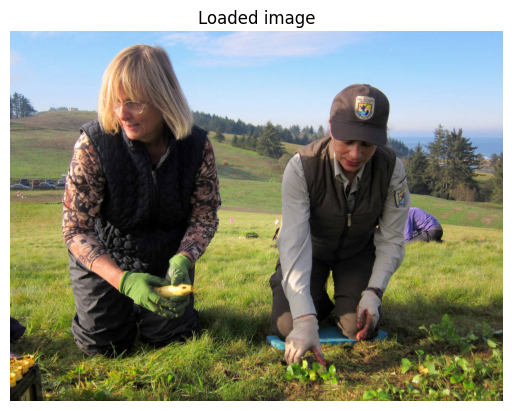

In [5]:
!wget -q -O image.jpg https://digitalmedia.fws.gov/digital/api/singleitem/image/natdiglib/30018/default.jpg
from matplotlib import pyplot as plt
import cv2

img = cv2.imread("image.jpg")
plt.imshow(img[:, :, ::-1])
plt.title("Loaded image")
plt.axis("off")
plt.show()

## Running inference and visualizing the results

The final step is to run pose landmark detection on your selected image. This involves creating your PoseLandmarker object, loading your image, running detection, and finally, the optional step of displaying the image with visualizations.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker/python) to learn more about configuration options that this solution supports.


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


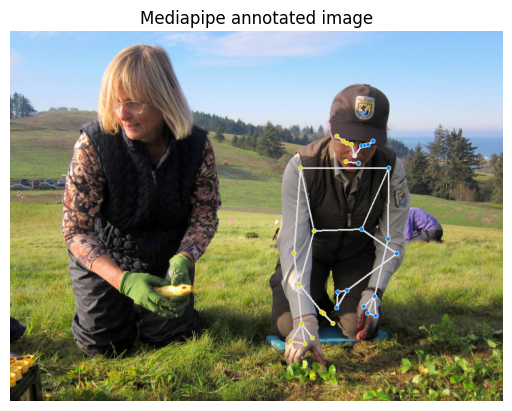

On output we obtain landmarks which contain information about the detection
NormalizedLandmark(x=0.6994890570640564, y=0.3374444246292114, z=-0.7859854698181152, visibility=0.9999947547912598, presence=0.9999996423721313)
NormalizedLandmark(x=0.7129285931587219, y=0.31018760800361633, z=-0.7725224494934082, visibility=0.9999924898147583, presence=0.9999983310699463)
NormalizedLandmark(x=0.7203145027160645, y=0.3094218969345093, z=-0.7727193236351013, visibility=0.9999779462814331, presence=0.9999973773956299)
NormalizedLandmark(x=0.7266842126846313, y=0.30820232629776, z=-0.7727563381195068, visibility=0.9999860525131226, presence=0.9999934434890747)
NormalizedLandmark(x=0.6923674941062927, y=0.30635571479797363, z=-0.7800499200820923, visibility=0.9999972581863403, presence=0.9999991655349731)
NormalizedLandmark(x=0.6834230422973633, y=0.30295342206954956, z=-0.780364990234375, visibility=0.9999960660934448, presence=0.9999994039535522)
NormalizedLandmark(x=0.6758177280426025, y=0.298

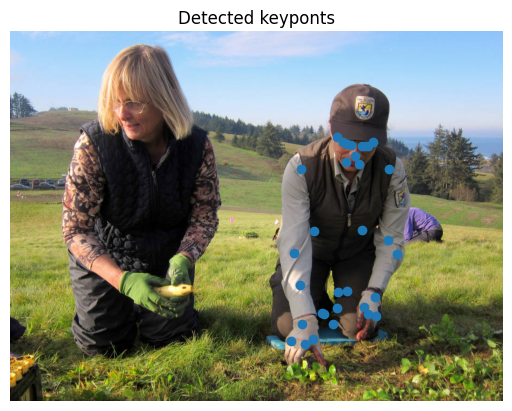

In [6]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe import solutions

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(base_options=base_options, output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image(image_format=mp.ImageFormat.SRGB, data=img[:, :, ::-1].copy())
# image = mp.Image.create_from_file("image.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)

plt.imshow(annotated_image)
plt.axis("off")
plt.title("Mediapipe annotated image")
plt.show()


print("On output we obtain landmarks which contain information about the detection")
for landmark in detection_result.pose_landmarks[0]:
  print(landmark)


print("We can also obtain the 2d keypoints image coordinates")
output_keypoints = []
for landmark in detection_result.pose_landmarks[0]:
  keypoint = np.array([landmark.x * img.shape[1], landmark.y * img.shape[0]])
  output_keypoints.append(keypoint)
output_keypoints = np.array(output_keypoints)


print(output_keypoints)

print("We can also draw them on the image")
plt.imshow(img[:, :, ::-1])
plt.axis("off")
plt.scatter(output_keypoints[:, 0], output_keypoints[:, 1])
plt.title("Detected keyponts")
plt.show()

In [7]:
print("We can also obtain the 3d keypoints in normalized coordinates")
keypoints_3d = []
for landmark in detection_result.pose_landmarks[0]:
  keypoint = np.array([landmark.x, landmark.y, landmark.z])
  keypoints_3d.append(keypoint)
xyz = np.array(keypoints_3d)

import plotly.express as px

fig = px.scatter_3d(x = xyz[:, 0], y = xyz[:, 1], z=xyz[:, 2])
fig.update_traces(marker={'size': 3})

fig.update_layout(
  scene = dict(
    aspectmode='cube',
    xaxis = dict(range=[-1,1],),
    yaxis = dict(range=[-1,1],),
    zaxis = dict(range=[-1,1],)))
fig.show()

We can also obtain the 3d keypoints in normalized coordinates


Visualize the pose segmentation mask.

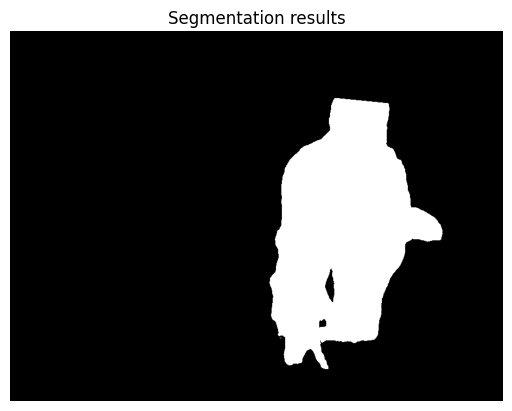

In [8]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
plt.imshow(segmentation_mask > 0.5, cmap='gray')
plt.title("Segmentation results")
plt.axis("off")
plt.show()